In [1]:
#Import code from last time
%run k3-4.ipynb

         Current function value: 0.084975
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104


<Figure size 640x480 with 1 Axes>

         Current function value: 0.076535
         Iterations: 100
         Function evaluations: 108
         Gradient evaluations: 108


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.64402223, 0.58322864, 0.48171501],
       [0.58322864, 0.48171501, 0.44281211],
       [0.48171501, 0.44281211, 0.49627058],
       [0.44281211, 0.49627058, 0.47546339],
       [0.49627058, 0.47546339, 0.55155979],
       [0.47546339, 0.55155979, 0.50099435],
       [0.55155979, 0.50099435, 0.44545859],
       [0.50099435, 0.44545859, 0.50571167],
       [0.44545859, 0.50571167, 0.46588904],
       [0.50571167, 0.46588904, 0.46785659],
       [0.46588904, 0.46785659, 0.45300142],
       [0.46785659, 0.45300142, 0.43741172],
       [0.45300142, 0.43741172, 0.3506737 ]])

In [3]:
testY

array([[0.44281211],
       [0.49627058],
       [0.47546339],
       [0.55155979],
       [0.50099435],
       [0.44545859],
       [0.50571167],
       [0.46588904],
       [0.46785659],
       [0.45300142],
       [0.43741172],
       [0.3506737 ],
       [0.36403131]])

In [4]:
trainX

array([[0.        , 0.051925  , 0.14831904],
       [0.051925  , 0.14831904, 0.11211342],
       [0.14831904, 0.11211342, 0.17073406],
       [0.11211342, 0.17073406, 0.2232566 ],
       [0.17073406, 0.2232566 , 0.24197469],
       [0.2232566 , 0.24197469, 0.36573346],
       [0.24197469, 0.36573346, 0.55255899],
       [0.36573346, 0.55255899, 0.37002352],
       [0.55255899, 0.37002352, 0.3325317 ],
       [0.37002352, 0.3325317 , 0.38788752],
       [0.3325317 , 0.38788752, 0.39836394],
       [0.38788752, 0.39836394, 0.2848263 ],
       [0.39836394, 0.2848263 , 0.18673502],
       [0.2848263 , 0.18673502, 0.18269477],
       [0.18673502, 0.18269477, 0.255617  ],
       [0.18269477, 0.255617  , 0.23597043],
       [0.255617  , 0.23597043, 0.16413413],
       [0.23597043, 0.16413413, 0.17817663],
       [0.16413413, 0.17817663, 0.1639561 ],
       [0.17817663, 0.1639561 , 0.13324148],
       [0.1639561 , 0.13324148, 0.22639902],
       [0.13324148, 0.22639902, 0.25501386],
       [0.

In [5]:
trainY

array([[0.11211342],
       [0.17073406],
       [0.2232566 ],
       [0.24197469],
       [0.36573346],
       [0.55255899],
       [0.37002352],
       [0.3325317 ],
       [0.38788752],
       [0.39836394],
       [0.2848263 ],
       [0.18673502],
       [0.18269477],
       [0.255617  ],
       [0.23597043],
       [0.16413413],
       [0.17817663],
       [0.1639561 ],
       [0.13324148],
       [0.22639902],
       [0.25501386],
       [0.23708614],
       [0.23165112],
       [0.23306761],
       [0.22117372],
       [0.22633168],
       [0.21869864],
       [0.2320322 ],
       [0.23194795],
       [0.22154782],
       [0.28795858],
       [0.28837327],
       [0.29714576],
       [0.24366982],
       [0.30743731],
       [0.35859786],
       [0.37218122],
       [0.45025948],
       [0.44309563],
       [0.55815598],
       [0.60235983],
       [0.69629172],
       [0.79060467],
       [0.64402223],
       [0.58322864],
       [0.48171501]])

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 3
        self.outputLayerSize = 1
        self.hiddenLayerSize = 4
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

7.605694605499123e-11

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

         Current function value: 0.003689
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105


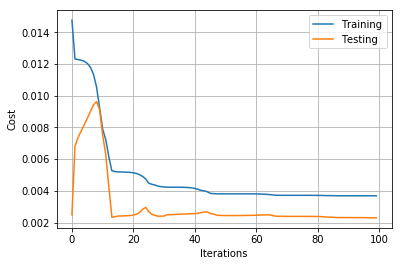

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.01475118]),
 array([0.012307]),
 array([0.01227226]),
 array([0.01223364]),
 array([0.01216424]),
 array([0.01203574]),
 array([0.01179626]),
 array([0.01135321]),
 array([0.01055524]),
 array([0.00924481]),
 array([0.00788004]),
 array([0.00723415]),
 array([0.00614947]),
 array([0.00526493]),
 array([0.00521894]),
 array([0.00519409]),
 array([0.00519148]),
 array([0.00518702]),
 array([0.00517909]),
 array([0.00516476]),
 array([0.00513905]),
 array([0.00509417]),
 array([0.00502074]),
 array([0.00491117]),
 array([0.00474886]),
 array([0.00448151]),
 array([0.0044145]),
 array([0.00436773]),
 array([0.00430024]),
 array([0.00426668]),
 array([0.00424679]),
 array([0.00423256]),
 array([0.00423163]),
 array([0.00423103]),
 array([0.00423016]),
 array([0.00422856]),
 array([0.00422553]),
 array([0.00421976]),
 array([0.00420887]),
 array([0.00418862]),
 array([0.00415231]),
 array([0.00409413]),
 array([0.00403367]),
 array([0.00400255]),
 array([0.00394549]),
 array([0.003

In [17]:
T.testJ

[array([0.00249091]),
 array([0.00682477]),
 array([0.00735896]),
 array([0.0077705]),
 array([0.00816309]),
 array([0.00856771]),
 array([0.00899845]),
 array([0.00941365]),
 array([0.00962591]),
 array([0.00913435]),
 array([0.00750915]),
 array([0.00629857]),
 array([0.00428117]),
 array([0.00233762]),
 array([0.00236812]),
 array([0.0024143]),
 array([0.00241879]),
 array([0.00242462]),
 array([0.00243359]),
 array([0.00244834]),
 array([0.0024749]),
 array([0.00252728]),
 array([0.00263714]),
 array([0.00284412]),
 array([0.00295832]),
 array([0.00268919]),
 array([0.00252526]),
 array([0.00246003]),
 array([0.00240528]),
 array([0.00240601]),
 array([0.00241612]),
 array([0.00250307]),
 array([0.00249864]),
 array([0.00250847]),
 array([0.00252077]),
 array([0.00252856]),
 array([0.00253568]),
 array([0.00254359]),
 array([0.00255298]),
 array([0.0025636]),
 array([0.00257253]),
 array([0.00258012]),
 array([0.00263802]),
 array([0.00267288]),
 array([0.00267371]),
 array([0.0025

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.0018208907945784858

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.18103641],
       [0.1760895 ],
       [0.20728372],
       [0.23835636],
       [0.25901199],
       [0.34084416],
       [0.47624031],
       [0.39374043],
       [0.36371829],
       [0.37877332],
       [0.3889895 ],
       [0.32269924],
       [0.25185745],
       [0.23073693],
       [0.2636965 ],
       [0.2600328 ],
       [0.22366914],
       [0.22245916],
       [0.21133029],
       [0.19555977],
       [0.24006084],
       [0.26393133],
       [0.26405521],
       [0.26119718],
       [0.26001016],
       [0.25293811],
       [0.25469719],
       [0.25000286],
       [0.25716077],
       [0.25796785],
       [0.25305931],
       [0.29088754],
       [0.29794083],
       [0.30892772],
       [0.27756608],
       [0.31081297],
       [0.34597856],
       [0.36640445],
       [0.42265337],
       [0.428719  ],
       [0.50568405],
       [0.54330403],
       [0.60508182],
       [0.657865  ],
       [0.6060355 ],
       [0.56739374],
       [0.49147788],
       [0.450

In [21]:
y

array([[0.11211342],
       [0.17073406],
       [0.2232566 ],
       [0.24197469],
       [0.36573346],
       [0.55255899],
       [0.37002352],
       [0.3325317 ],
       [0.38788752],
       [0.39836394],
       [0.2848263 ],
       [0.18673502],
       [0.18269477],
       [0.255617  ],
       [0.23597043],
       [0.16413413],
       [0.17817663],
       [0.1639561 ],
       [0.13324148],
       [0.22639902],
       [0.25501386],
       [0.23708614],
       [0.23165112],
       [0.23306761],
       [0.22117372],
       [0.22633168],
       [0.21869864],
       [0.2320322 ],
       [0.23194795],
       [0.22154782],
       [0.28795858],
       [0.28837327],
       [0.29714576],
       [0.24366982],
       [0.30743731],
       [0.35859786],
       [0.37218122],
       [0.45025948],
       [0.44309563],
       [0.55815598],
       [0.60235983],
       [0.69629172],
       [0.79060467],
       [0.64402223],
       [0.58322864],
       [0.48171501],
       [0.44281211],
       [0.496

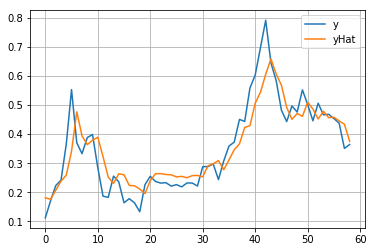

In [22]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [23]:
prediksi=NN.forward(dataprediksi)

In [24]:
prediksi

array([[0.37154441],
       [0.61729808],
       [0.72601197],
       [0.65799443]])

In [25]:
from sklearn.metrics import mean_squared_error 

In [26]:
Y_true= ([	0.795380412	]	,
[	1	]	,
[	0.707681705	]	,
[	0.491695324	]	,
	)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.0885222782851201

In [27]:
dataprediksi

array([[0.43741172, 0.3506737 , 0.36403131],
       [0.3506737 , 0.36403131, 0.79538041],
       [0.36403131, 0.79538041, 1.        ],
       [0.79538041, 1.        , 0.70768171]])

In [28]:
a=np.array([	1	,	0.707681705	,	0.491695324	])

In [29]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.53912595])

In [30]:
#prediksi 2
c=prediksi
b=a[1:]
d=np.concatenate((b,c))
prediksi=NN.forward(d)
prediksi

array([0.52039604])

In [31]:
#prediksi 3
c=prediksi
b=d[1:]
e=np.concatenate((b,c))
prediksi=NN.forward(e)
prediksi

array([0.49735522])

In [32]:
#prediksi 4
c=prediksi
b=e[1:]
f=np.concatenate((b,c))
prediksi=NN.forward(f)
prediksi

array([0.48513479])

In [33]:
#prediksi 5
c=prediksi
b=f[1:]
g=np.concatenate((b,c))
prediksi=NN.forward(g)
prediksi

array([0.47339488])

In [34]:
#prediksi 6
c=prediksi
b=g[1:]
h=np.concatenate((b,c))
prediksi=NN.forward(h)
prediksi

array([0.46273435])

In [35]:
#prediksi 7
c=prediksi
b=g[1:]
i=np.concatenate((b,c))
prediksi=NN.forward(i)
prediksi

array([0.45606881])

In [36]:
#prediksi 8
c=prediksi
b=g[1:]
j=np.concatenate((b,c))
prediksi=NN.forward(j)
prediksi

array([0.45188357])

In [37]:
#prediksi 9
c=prediksi
b=g[1:]
k=np.concatenate((b,c))
prediksi=NN.forward(k)
prediksi

array([0.44924919])

In [38]:
#prediksi 10
c=prediksi
b=g[1:]
l=np.concatenate((b,c))
prediksi=NN.forward(l)
prediksi

array([0.44758854])

In [39]:
#prediksi 11
c=prediksi
b=g[1:]
m=np.concatenate((b,c))
prediksi=NN.forward(m)
prediksi

array([0.44654074])

In [40]:
#prediksi 12
c=prediksi
b=g[1:]
n=np.concatenate((b,c))
prediksi=NN.forward(n)
prediksi

array([0.44587926])